In [ ]:
import re

def clean_text(
    string: str,
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string







In [ ]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

# Example list of texts. Replace this with your actual text data
texts = ["This is the first text.", "This is the second text."]

for text in texts:

    # Cleaning the text
    #text = text_preprocessing(text) # Assuming text_preprocessing is defined elsewhere

    # Appending to the all text list
    all_text += text.split() # Split the text into words

    # Creating a context dictionary
    for i, word in enumerate(text.split()):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text.split()):
                word_lists.append([word] + [text.split()[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text.split()[(i - w - 1)]])


def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()
    return {word: i for i, word in enumerate(words)} # Return the dictionary

unique_word_dict = create_unique_word_dict(all_text) # Call the function to create the dictionary
print(unique_word_dict)

{'This': 0, 'first': 1, 'is': 2, 'second': 3, 'text.': 4, 'the': 5}


In [ ]:
!pip install tqdm
from tqdm import tqdm # Import the tqdm module
import numpy as np

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)): # Use tqdm to wrap the iterator
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

28it [00:00, 99189.62it/s]


In [ ]:
# Deep learning:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense



# Defining the size of the embedding
embed_size = 2


# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X,
    y=Y,
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network.
# These are the so called word embeddings

# The input layer
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and
# the value is the numeric vector
embedding_dict = {}
for word in words:
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8637
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 1.8623
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.8609
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8596
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8582
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.8569
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8555
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8542
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8529
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8515
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.8502
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.8489
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.8476
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.8463
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.8450
Epoch

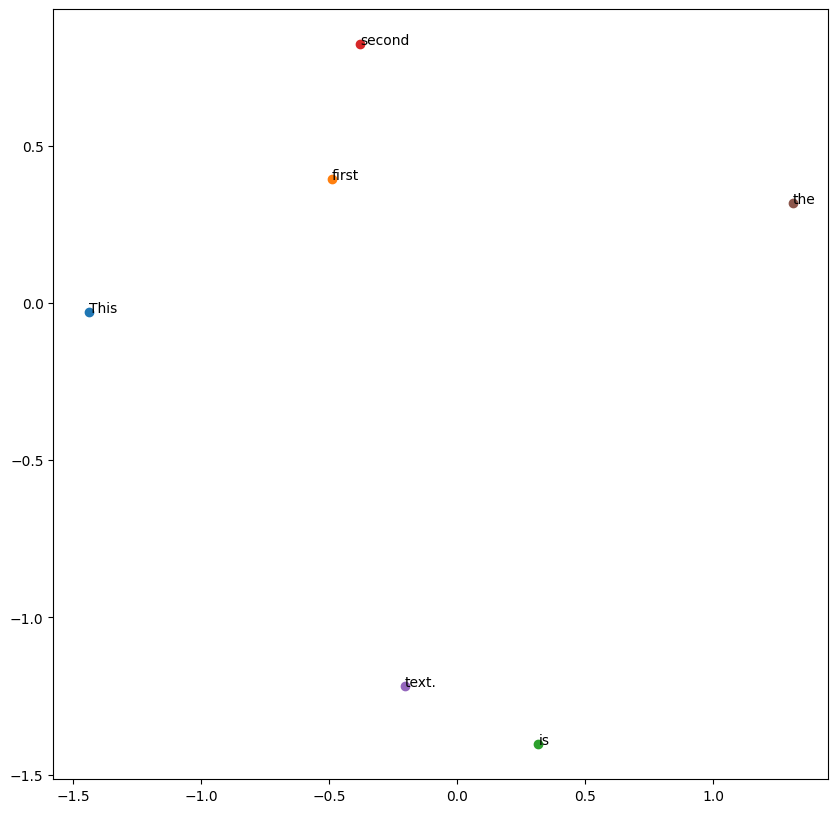

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))
